#### 🏪Walmart Sales Dataset of 45stores
🔹 데이터셋 : https://www.kaggle.com/datasets/varsharam/walmart-sales-dataset-of-45stores

📌 데이터 불러오기 및 분석

In [313]:
import pandas as pd

In [314]:
mart = pd.read_csv('walmart.csv', parse_dates=['Date'])
mart

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specif

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [315]:
mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [316]:
mart['Weekly_Sales'].describe()

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

In [317]:
mart.value_counts()

Store  Date        Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  CPI         Unemployment
1      2010-01-10  1453329.50    0             71.89        2.603       211.671989  7.838           1
30     2012-10-19  437537.29     0             68.52        3.594       223.059808  6.170           1
31     2010-03-12  1338716.37    0             50.43        2.708       211.265543  8.163           1
       2010-03-09  1302047.48    0             82.57        2.577       211.188693  8.099           1
       2010-02-26  1344354.41    0             45.31        2.561       210.975957  8.324           1
                                                                                                   ..
15     2012-10-26  558473.60     0             55.75        4.071       138.728161  7.992           1
       2012-10-19  555652.77     0             52.89        4.153       138.833613  7.992           1
       2012-10-08  590453.63     0             73.99        3.863       138.143774  8.1

📌 데이터 전처리

In [318]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import *
from sklearn.utils import *

import matplotlib.pyplot as plt
import numpy as np

In [319]:
# "Date"를 분기로 나누기
def mapQuarters(num):
    if num >= 10:
        return 4
    elif num >= 7:
        return 3
    elif num >= 4:
        return 2
    else:
        return 1

In [320]:
mart['Day'] = mart['Date'].dt.dayofweek     # 0(Monday) ~ 6(Sunday)
mart['month'] = mart['Date'].dt.month
mart['quarter'] = mart['month'].apply(lambda x : mapQuarters(x))

In [321]:
mart.drop('Date', axis=1, inplace=True)

In [322]:
mart.head(3)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,month,quarter
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,4
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,1


In [323]:
mart['Store'] = mart['Store'].astype('str')

In [324]:
mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   object 
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Day           6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   quarter       6435 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 502.9+ KB


In [325]:
dummy_df = pd.get_dummies(mart['Store'])

In [326]:
mart.drop('Store', axis=1, inplace=True)

In [327]:
mart_df = pd.concat([mart, dummy_df], axis=1)
mart_df

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,month,quarter,1,...,41,42,43,44,45,5,6,7,8,9
0,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2,1,...,0,0,0,0,0,0,0,0,0,0
1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,4,1,...,0,0,0,0,0,0,0,0,0,0
2,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,713173.95,0,64.88,3.997,192.013558,8.684,4,9,3,0,...,0,0,0,0,1,0,0,0,0,0
6431,733455.07,0,64.89,3.985,192.170412,8.667,3,5,2,0,...,0,0,0,0,1,0,0,0,0,0
6432,734464.36,0,54.47,4.000,192.327265,8.667,0,12,4,0,...,0,0,0,0,1,0,0,0,0,0
6433,718125.53,0,56.47,3.969,192.330854,8.667,4,10,4,0,...,0,0,0,0,1,0,0,0,0,0


In [328]:
mart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 54 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  6435 non-null   float64
 1   Holiday_Flag  6435 non-null   int64  
 2   Temperature   6435 non-null   float64
 3   Fuel_Price    6435 non-null   float64
 4   CPI           6435 non-null   float64
 5   Unemployment  6435 non-null   float64
 6   Day           6435 non-null   int64  
 7   month         6435 non-null   int64  
 8   quarter       6435 non-null   int64  
 9   1             6435 non-null   uint8  
 10  10            6435 non-null   uint8  
 11  11            6435 non-null   uint8  
 12  12            6435 non-null   uint8  
 13  13            6435 non-null   uint8  
 14  14            6435 non-null   uint8  
 15  15            6435 non-null   uint8  
 16  16            6435 non-null   uint8  
 17  17            6435 non-null   uint8  
 18  18            6435 non-null 

📌 학습용, 테스트용 데이터 분리

In [329]:
mart_df['Weekly_Sales'] = np.log(mart_df.Weekly_Sales)
y = mart_df.pop('Weekly_Sales')

In [330]:
mart_df.head(3)

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,month,quarter,1,10,...,41,42,43,44,45,5,6,7,8,9
0,0,42.31,2.572,211.096358,8.106,6,5,2,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,38.51,2.548,211.242170,8.106,3,12,4,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,39.93,2.514,211.289143,8.106,4,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [331]:
y

0       14.312455
1       14.311400
2       14.292966
3       14.158907
4       14.256862
          ...    
6430    13.477481
6431    13.505522
6432    13.506897
6433    13.484400
6434    13.541444
Name: Weekly_Sales, Length: 6435, dtype: float64

In [332]:
X_tr, X_te, y_tr, y_te = train_test_split(mart_df, y, test_size=0.3, random_state=42)

In [333]:
X_tr.shape, y_tr.shape

((4504, 53), (4504,))

In [334]:
X_te.shape, y_te.shape

((1931, 53), (1931,))

📌 학습 및 평가

In [335]:
# rets = all_estimators(type_filter='regressor')

In [336]:
# result = []
# for name, estimator_ in rets:
#     try:
#         model = estimator_()
#         model.fit(X_tr, y_tr)
#         mse = mean_squared_error(X_te, y_te)
#         result.append((name, mse))
#     except Exception:
#         pass

In [345]:
rf = RandomForestRegressor()
rf.fit(X_tr, y_tr)
y_pre = rf.predict(X_te)
mean_squared_error(y_te, y_pre), r2_score(y_te, y_pre)

(0.009594160256253665, 0.9727861975596429)

In [347]:
rf.feature_importances_

array([1.61047357e-03, 9.10667191e-03, 6.50060094e-03, 3.80083904e-02,
       1.76161826e-02, 2.80482367e-03, 8.83342959e-03, 5.90031803e-04,
       1.08375680e-04, 1.29454127e-02, 4.56728865e-04, 3.17993045e-05,
       8.66540590e-03, 1.28528762e-02, 3.10461992e-02, 3.86761204e-02,
       6.03329137e-03, 5.13856168e-04, 4.16969826e-03, 8.14109701e-03,
       1.46652454e-02, 1.85899987e-02, 4.66466793e-04, 3.71947725e-03,
       4.15251405e-03, 2.23281877e-02, 4.14524713e-04, 1.17585977e-02,
       3.71699441e-03, 3.22456063e-02, 5.23699569e-02, 4.97413359e-02,
       2.60239988e-04, 2.64976919e-03, 9.09227114e-02, 7.19248798e-05,
       9.23995171e-04, 6.10878986e-02, 3.65557730e-02, 5.93512918e-02,
       3.22980079e-04, 8.96166021e-03, 7.44940833e-04, 2.39516098e-05,
       3.43300695e-02, 2.25553405e-02, 8.31986384e-02, 1.62532442e-02,
       7.92862498e-02, 7.42465058e-05, 3.22968617e-02, 1.14765098e-02,
       3.57713314e-02])

In [348]:
ip = pd.DataFrame(rf.feature_importances_, index=mart_df.columns).sort_values(by = 0)
ip

,0
41,0.000024
12,0.000032
34,0.000072
6,0.000074
1,0.000108
31,0.000260
39,0.000323
26,0.000415
11,0.000457
22,0.000466


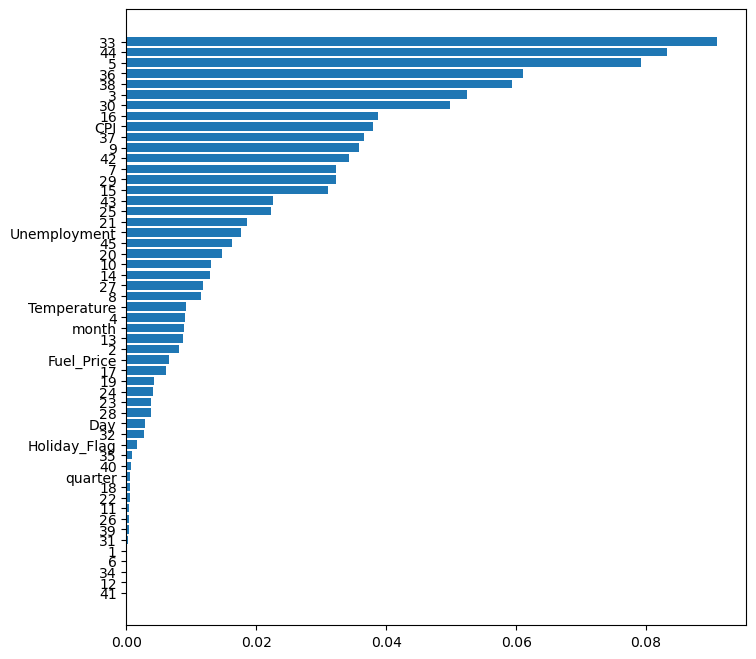

In [349]:
plt.figure(figsize=(8, 8))
plt.barh(ip.index, ip[0])
plt.show()

In [354]:
import statsmodels.api as sm
drop_df = mart
model = sm.OLS(y, drop_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.301e+05
Date:                Thu, 16 Mar 2023   Prob (F-statistic):                        0.00
Time:                        18:13:37   Log-Likelihood:                         -9215.8
No. Observations:                6435   AIC:                                  1.845e+04
Df Residuals:                    6426   BIC:                                  1.851e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Weekly_Sales  1.436e-06   2.21e-08     65.074      0.000    1.39e-06    1.48e-06
Holiday_Flag     0.0067      0.054      0.125      0.900      -0.099       0.112
Temperature     -0.0029      0.001     -3.880      0.000      -0.004      -0.001
Fuel_Price       1.6272      0.020     80.003      0.000       1.587       1.667
CPI              0.0173      0.000     61.182      0.000       0.017       0.018
Unemployment     0.3240      0.006     52.996      0.000       0.312       0.336
Day              0.1683      0.009     19.304      0.000       0.151       0.185
month           -0.1204      0.015     -7.890      0.000      -0.150      -0.090
quarter          0.5758      0.046     12.402      0.000       0.485       0.667
==============================================================================
Omnibus:                       67.976   Durbin-Watson:                   0.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.634
Skew:                           0.189   Prob(JB):                     6.82e-14
Kurtosis:                       2.712   Cond. No.                     5.07e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""